In [15]:
##Importing the necessary libraries

import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
# from public_tests import *

y = [0], it's a 'non-cat' picture.


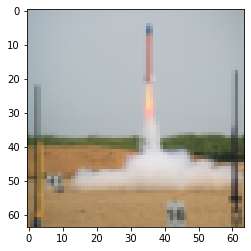

In [16]:
########### Preprocessing of data############

# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
# Example of a picture
index = 22  # train_set_x_orig > is saved as a np array with the size (209,64,64,3); which the first is the number of images, the second and the third are the dimensions of an image and the last is 3 changels of RGB
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

# Finding the values for number of training examples, number of test examples, and dimensions of a training image
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
num_px=train_set_x_orig.shape[1]
# now we need to reshape the data so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1). 
# One way to do above (flattern matrix X of shape (a,b,c,d) to a matrix X_flattern of shape (b*c*d,a)) is to use: X_flatten = X.reshape(X.shape[0], -1).T 
train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten=test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
# now we need to standardize our dataset:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [19]:
############### Bulding different functions for our model########

#### Sigmoid Func
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s
### Initialize Func
def initialize_with_zeros(dim):
    w=np.zeros((dim,1))
    b=0.0
    return w,b
## Propagate
def propagate(w,b,X,Y):
    m=X.shape[1]
    #forward propagation
    A=sigmoid(np.dot(w.T,X)+b)
    test=np.dot(Y,np.log(A).T)+np.dot((1-Y),np.log(1-A).T)
    cost=(-1/m)*(test)   # be careful that here sum is inside matrix multiply
    #backward propagation 
    dw=(1/m)*(np.dot(X,(A-Y).T))
    db=(1/m)*(np.sum(A-Y))
    cost=np.squeeze(np.array(cost))   
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost
### Optimze Func to learn w and b by minimizing the cost function J (using Gradient Discent algorithm)
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w=w-learning_rate*dw
        b=b-learning_rate*db
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

### Predic Func to predit based on learned w and b
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1) # w has the same size as feautures (number of pixels of an image)
    A=sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]): #A.shape[1] is the number of images that we want to preedict
        if A[0,i]>0.5:
            Y_prediction[0,i]=1
        else:
            Y_prediction[0,i]=0
    return Y_prediction
 

In [20]:
################# Now it's timen to merge all the functions together to build a model##############
### Model Func
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    dim=X_train.shape[0]
    w, b = initialize_with_zeros(dim)
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=False)
    w=params["w"]
    b=params["b"]
    Y_prediction_train=predict(w,b,X_train)
    Y_prediction_test=predict(w,b,X_test)
    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d


In [21]:
### Here is how we can implement the model
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)



train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


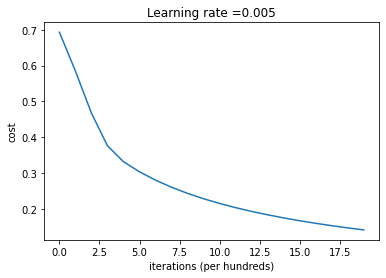

In [22]:
### Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()